## Problem 1: Golden Section Search

In [6]:
import math

def golden(f, a, b, niter = 1000, true_val = None, tol = None):
    """Uses the Golden Section search method to find
    a minimum for the strictly unimodal function f on
    the closed interval [a,b], stopping after niter iterations
    or once we are within tol of the true_val (optional)"""
    p = (3-math.sqrt(5))/2
    a_star = a + p*(b-a)
    b_star = a + (1-p)*(b-a)
    iterations = 0
    if true_val == None:
        while iterations < niter:
            if f(a_star) < f(b_star):
                b = b_star
            else:
                a = a_star
            a_star = a + p*(b-a)
            b_star = a + (1-p)*(b-a)
            iterations += 1
        return (a_star+b_star)/2
    else:
        while iterations < niter and abs((a_star+b_star)/2 - true_val) > tol:
            if f(a_star) < f(b_star):
                b = b_star
            else:
                a = a_star
            a_star = a + p*(b-a)
            b_star = a + (1-p)*(b-a)
            iterations += 1
        print("Converged after " + str(iterations) + " iterations")
        return (a_star+b_star)/2
            
    

In [12]:
f = lambda x: math.exp(x) - 4*x
a = 0
b = 3
true_val = float(math.log(4))
print(golden(f,a,b,1000,true_val, tol=.001))

Converged after 13 iterations
1.3855782167742121


The minimizer converged and took 13 steps to get within .001 of the true minimizer.

## Problem 2: Bisection Method

In [10]:
def centered4(f, x, h=0.001):
    return (f(x-2*h)-8*f(x-h)+8*f(x+h)-f(x+2*h))/(12*h)

def bisection(f, a, b, niter = 1000, true_val = None, tol = None):
    """Uses the bisection search method to find
    a minimum for the strictly unimodal function f on
    the closed interval [a,b], stopping after niter iterations
    or once we are within tol of the true_val (optional);
    uses the centered-4 method to estimate the derivative"""
    a = a
    b = b
    iterations = 0
    if true_val == None:
        while iterations < niter:
            mid = (a+b)/2
            if centered4(f, mid) > 0:
                a = a
                b = mid
            else:
                a = mid
                b = b
            iterations += 1
        return ((a+b)/2)
    else:
        while iterations < niter and abs((a+b)/2 - true_val) > tol:
            mid = (a+b)/2
            if centered4(f, mid) > 0:
                a = a
                b = mid
            else:
                a = mid
                b = b
            iterations += 1
        print("Converged after " + str(iterations) + " iterations")
        return ((a+b)/2)
            

In [11]:
f = lambda x: math.exp(x) - 4*x
a = 0
b = 3
true_val = float(math.log(4))
print(bisection(f,a,b,1000,true_val, tol=.001))

Converged after 9 iterations
1.3857421875


The minimizer took 9 steps to get within .001 if the true minimizer - faster than the golden search method.

## Problem 3: Newton's Method

In [31]:
def newton(x0, f1, f2):
    """Implements Newton's method for minimization
    Inputs: x0 - initial guess
        f1 - first derivative of f
        f2 - second derivative of f
    Returns: approximation to the minimizer provided
    that the algorithm converges for initial condition"""
    maxiter = 100
    xold = x0
    if f2(xold) != 0:
        xnew = xold - f1(xold)/f2(xold)
    else:
        raise ValueError("Function or initial condition resulted in division by 0")
    iterations = 1
    while iterations < maxiter:
        xold = xnew
        if f2(xold) != 0:
            xnew = xold - f1(xold)/f2(xold)
        else:
            raise ValueError("Function or initial condition resulted in division by 0")
        iterations += 1
    if f2(xnew) < 0:
        print("Converged to " + str(xnew) + "after " + str(iterations) + " iterations but local maximum")
    else:
        print("Minimizer is " + str(xnew))
    return xnew

In [32]:
f = lambda x: x**2 + math.sin(5*x)
f1 = lambda x: 2*x + 5*math.cos(5*x)
f2 = lambda x: 2 - 25*math.sin(5*x)
x0 = 0

newton(x0, f1, f2)

Minimizer is -1.4473142236328096


-1.4473142236328096

We note that this is a local minimum but is not the correct minimizer (which occurs around x = -0.29). We try other starting values to see where this happens.

In [33]:
x1 = -0.25
x2 = -1.0
x3 = 1.0
x4 = -0.30

newton(x1, f1, f2)
newton(x2, f1, f2)
newton(x3, f1, f2)
newton(x4, f1, f2)

Minimizer is -0.29083931499532345
Converged to -1.0271579225192684after 100 iterations but local maximum
Minimizer is 0.8712810830760778
Minimizer is -0.29083931499532345


-0.29083931499532345

## Problem 4: Secant Method

In [52]:
def secant(x0, x1, f1):
    """Implements secant method for minimization
    Inputs: x0, x1 - initial guesses
        f1 - first derivative of f
    Returns: approximation to the minimizer provided
    that the algorithm converges for initial condition"""
    maxiter = 100
    x0 = x0
    x1 = x1
    if f1(x1)-f1(x0) != 0:
        x2 = x1 - ((x1-x0)/(f1(x1)-f1(x0)))*f1(x1)
    else:
        raise ValueError("Function or initial condition resulted in division by 0")
    iterations = 1
    while iterations < maxiter:
        x0 = x1
        x1 = x2
        if f1(x1)-f1(x0) != 0:
            x2 = x1 - ((x1-x0)/(f1(x1)-f1(x0)))*f1(x1)
        else:
            print("Arrived at value of " + str(x2) + " after " + str(iterations) + " iterations before division by 0")
            return x2
            raise ValueError("Function or initial condition resulted in division by 0")
        iterations += 1
    print("Minimizer is " + str(xnew))
    return x2

In [53]:
f = lambda x: x**2 + math.sin(x) + math.sin(10*x)
f1 = lambda x: 2*x + math.cos(x) + 10*math.cos(10*x)
secant(0,-1,f1)

Arrived at value of -0.16367722118190792 after 12 iterations before division by 0


-0.16367722118190792

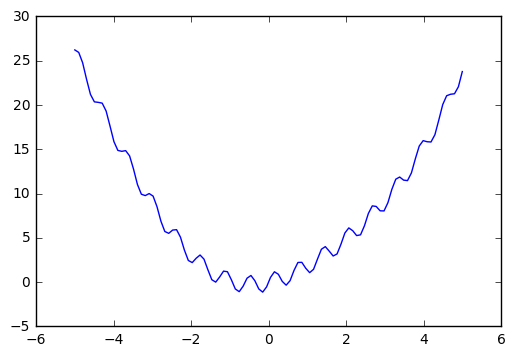

In [36]:
# Plot the function to see why the algorithm is senstiive
import numpy as np
from matplotlib import pyplot as plt

f = lambda x: x**2 + math.sin(x) + math.sin(10*x)
x = np.linspace(-5,5,100)
y = np.zeros(100)
for i in range(len(x)):
    y[i] = f(x[i])
plt.plot(x,y)
plt.show()

There are many local minima and maxima for the function so we can see that it will be very sensitive to the starting point.

In [55]:
# Trying other initial conditions:
secant(1,-2,f1)
secant(2,3,f1)
secant(-4,8,f1)

Arrived at value of -1.9964118165743994 after 7 iterations before division by 0
Arrived at value of 0.1703816610153652 after 18 iterations before division by 0
Arrived at value of 2.3155516573790806 after 11 iterations before division by 0


2.3155516573790806

## Problem 5

In [56]:
# TODO